## A brant goose, the 1917 Avian Influenza Virus and museum specimens

A [2002 article](https://doi.org/10.1128/JVI.76.15.7860-7862.2002) from the *Journal of Virology* mentions the following: 

*A brant goose (Branta bernicla) was collected by G. D. Hanna from St. Paul Island, Pribilof Islands, Alaska, on 9 Sept. 1917. RT-PCR with primers specific for the H1 subtype gave a positive signal from the 1917 brant goose.*

The researchers used specimens from the Smithsonian for this project:

*The Smithsonian Institution in Washington, D.C., has several thousand preserved bird specimens from the early part of the 20th century. Wild waterfowl collected by Smithsonian Institution researchers between 1915 and 1920, cataloged and preserved in ethanol, were used for the study.*

![Brant Goose](https://upload.wikimedia.org/wikipedia/commons/thumb/3/3f/Branta_bernicla_-Iceland-8.jpg/440px-Branta_bernicla_-Iceland-8.jpg)
image source: https://en.wikipedia.org/wiki/Black_brant


This notebook shows the importance of linking and tracing data from scholarly publications using persistent identifiers. The notebook also highlights issues with FAIR data and demonstrates how Digital Specimen and Natural Science Identifier (NSId) can address some of these gaps. 

In [7]:
## The data from the paper, using google scholar we can get the DOI, the pdf
## and extract texts from it. 

from scholarly import scholarly
search_query = scholarly.search_pubs('1917 Hemagglutinin Directly from Birds')
print(next(search_query))

{'bib': {'abstract': 'Wild waterfowl captured between 1915 and 1919 were '
                     'tested for influenza A virus RNA. One bird, captured in '
                     '1917, was infected with a virus of the same '
                     'hemagglutinin (HA) subtype as that of the 1918 pandemic '
                     'virus. The 1917 HA is more closely related to that of '
                     'modern avian',
         'author': ['TG Fanning', 'RD Slemons', 'AH Reid'],
         'cites': '73',
         'eprint': 'https://jvi.asm.org/content/jvi/76/15/7860.full.pdf',
         'gsrank': '1',
         'title': '1917 avian influenza virus sequences suggest that the 1918 '
                  'pandemic virus did not acquire its hemagglutinin directly '
                  'from birds',
         'url': 'https://jvi.asm.org/content/76/15/7860.short',
         'venue': 'Journal of …',
         'year': '2002'},
 'citations_link': '/scholar?cites=10647908837644157821&as_sdt=5,33&sciodt=0,33&hl=en

First, the paper -- it has a DOI -- using google scholar we can get the DOI, the pdf and extract texts from it. How do we track down the specimens and sequences mentioned in the article? Which of these steps can be automated?

From the journal article, we can extract the following: 
>>   
>>Nucleotide sequence accession numbers. The GenBank accession numbers for the 1917 goose sequence fragments are
>>AY095226 (HA1), AY095227 (HA2), and AY095228 (NP).  
>>

Now, using the identifiers from ENA we can find out more about these sequences. 

In [8]:
import enasearch
enaresult = enasearch.retrieve_data(      
    ids="AY095226",
        download=None,
        display="text",
        file=None,
        offset=0,
        header=None, 
        expanded=True)

This is the source extracted from the ENA result.
```
FT   source          1..166
FT                   /organism="Influenza A virus (A/Brant Goose/1/1917(H1N?))"
FT                   /strain="A/Brant goose/1/1917 (H1N?)"
FT                   /mol_type="mRNA"
FT                   /note="obtained from preserved Brant goose (Branta
FT                   bernicula) specimen from the Smithsonian Institution's
FT                   Museum of Natural History; specimen was originally
FT                   collected by G.D. Hanna from St. Paul Island, Pribilof
FT                   Islands, Alaska, on Sept. 9, 1917"
```

As you can see, the above contains no machine readable identifiers that can be resolved. But based on the description (we are assumming it is correct), we can try to track the specimens in the Smithsonian collection. 

We can use the gbif API for this. But before that two more things to point out: 

1. There is a typo in the scientific name: *Branta bernicula* should be *Branta bernicla*. We can use *Branta* in our search string. 
2. We need to know how to find the correct collection holding organisation (there are several listed under Smithsonian). The relevant 
institution code is [USNM](https://registry.gbif.org/institution/586ee56e-b0fe-4dff-b7f9-aeb104f3308a) -- again this is not an unambiguous persistent identifier. 

Let's build the gbif query: 

In [10]:
import urllib.request, json
gbifQ = "http://api.gbif.org/v1/occurrence/search?q=Branta&institution_code=usnm&month=9&year=1917"

# Display the data
with urllib.request.urlopen(gbifQ) as url:
    gbifdata = json.loads(url.read().decode())
    print(gbifdata['results'][0]['scientificName'])
    print(gbifdata['results'][0]['stateProvince'])
    print(gbifdata['results'][0]['higherGeography'])
    print(gbifdata['results'][0]['locality'])
    print(gbifdata['results'][0]['recordedBy'])
    print(gbifdata['results'][0]['datasetName'])
    print(gbifdata['results'][0]['occurrenceID'])

Branta bernicla nigricans (Lawrence, 1846)
Alaska
North America, United States, Alaska, Aleutians West Census Area
Saint Paul Island, Pribilof Islands
G. Hanna
NMNH Extant Biology
http://n2t.net/ark:/65665/396827066-bc6d-4419-83e7-25774fe2b0d3


Looking at the results from GBIF and ENA and comparing this with the text from the article we now can manual verify that the specimen used here was *Branta bernicla nigricans* and we can locate the physical specimen using this persistent identifier: http://n2t.net/ark:/65665/396827066-bc6d-4419-83e7-25774fe2b0d3

It needed some manual work but we got there eventually. Now another researcher can track down this physical specimen and access the sequence data from these links. Imagine, if all these data were packaged using a single persistent identifier and method to automate the verificiation and linking. This is where the idea of Digital Specimen and Natural Science Identifier come in. The record could look like this: 

```
{
	"physicalSpecimenId": "http://n2t.net/ark:/65665/396827066-bc6d-4419-83e7-25774fe2b0d3",
	"gbifId": "https://www.gbif.org/occurrence/1320604744",
	"institutionCode": "USNM",
	"collectionDate": "1917-09-09T00:00:00",
	"id": "20.5000.1025/testid",
	"catOfLifeReference": "http://www.catalogueoflife.org/col/details/species/id/54c88481b6ca5f0629dec555e7bf1235",
	"locality": "Saint Paul Island, Pribilof Islands",
	"country": "United States of America",
	"scientificName": "Branta bernicla nigricans (Lawrence, 1846)",
	"catalogNumber": "USNM 226278",
	"recordedBy": "G. Hanna",
    "bionomia": "https://bionomia.net/Q3093467",
	"ebiSearchResults": [{
		"description": "Influenza A virus (A/Brant Goose/1/1917(H1N?)) hemagglutinin (HA) mRNA, partial cds.",
		"scientific_name": "Influenza A virus (A/Brant Goose/1/1917(H1N?))",
		"tax_id": "194387",
		"accession": "AY095227",
        "enalink": "https://www.ebi.ac.uk/ena/browser/view/AY095227",
		"base_count": "288",
		"dataclass": "STD",
		"environmental_sample": "false",
		"first_public": "2002-07-02",
		"germline": "false",
		"mol_type": "mRNA",
		"sample_accession": "",
		"sequence_md5": "d3e58ab6ebf1d87e42e0798ae7f19aea",
		"strain": "A/Brant goose/1/1917 (H1N?)"
	}]
}
```

Along with persistent data linking, this also helps in data curation. For instance, We can add a name verificiation step that can check the name, verify the source material for the sequence, provide more information about the locality and the collection. When a new element such as new sequence, publication, or images 

**TODO**: Create digital specimen record with a real persistent identifier. 

One of the advantages of using persistent identifiers for the elements in the data infrascture is to make these elements actionable. 

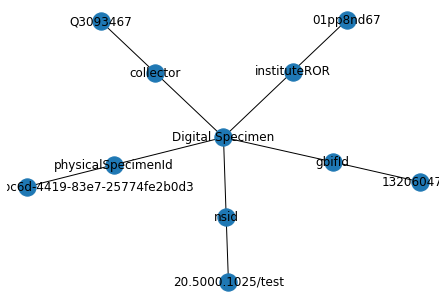

In [2]:
%matplotlib inline 

import networkx as nx

js= {"physicalSpecimenId": "ark:/65665/396827066-bc6d-4419-83e7-25774fe2b0d3", 
      "instituteROR": "01pp8nd67",
     "nsid": "20.5000.1025/test",
     "gbifId": "1320604744",
     "collector": "Q3093467"
      }
    
G=nx.Graph()
for key in js.keys():
    G.add_edge('Digital Specimen',key)

def walk(node):
    for key, item in node.items():
        if isinstance(item, list):
            for i in item:
                G.add_edge(key,i)
        if isinstance(item, dict):
            for j in item.keys():
                G.add_edge(key,j)
            walk(item)
        elif isinstance(item,str):
            G.add_edge(key,item)

walk(js)
nx.draw(G,with_labels=True)

Update the graph as new information emerges and use the Digital Specimen as the anchor for not just linking but for data curation and verification. 